In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
df_index= pd.read_csv("Book.csv")

In [25]:
df_index.head()


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [26]:
# drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [27]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [28]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

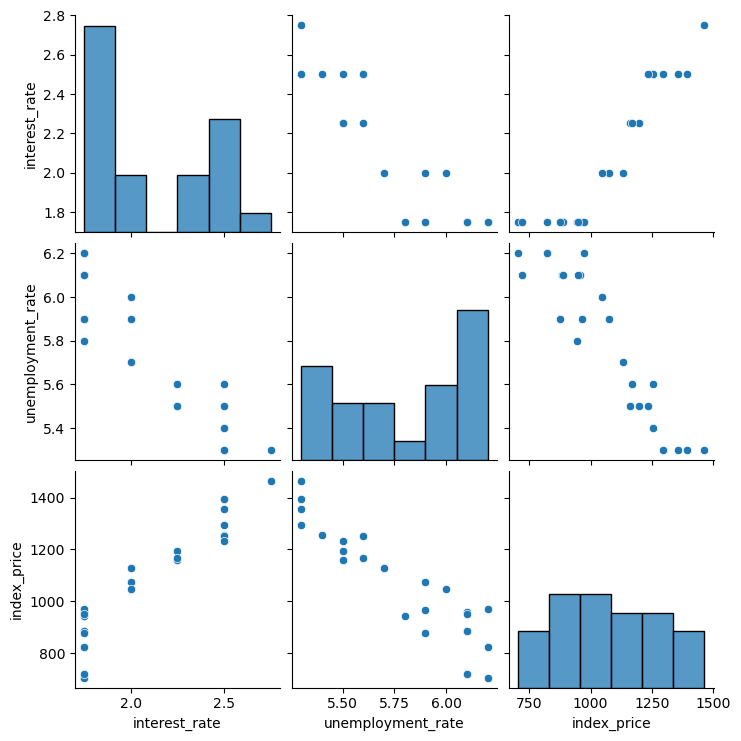

In [29]:
## lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [30]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935551
unemployment_rate,-0.925814,1.000000,-0.921791
index_price,0.935551,-0.921791,1.000000


Text(0, 0.5, 'Unemployment rate')

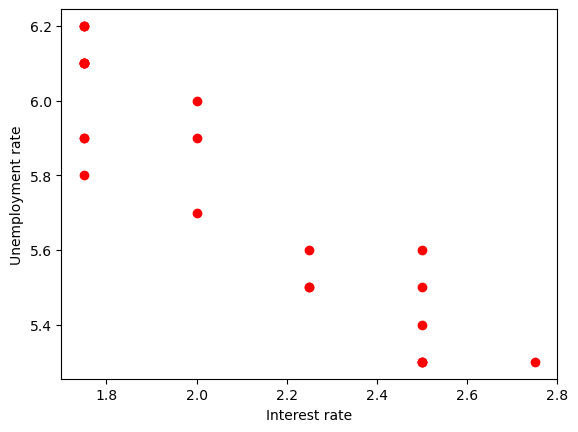

In [31]:
## Visualize the datapoints more closely 

plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [32]:
## indepenedent and dependent features
# X=df_index[['interest_rate','unemployment_rate']]

X= df_index.iloc[:,:-1]
y= df_index.iloc[:,-1]

In [33]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [34]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     886
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [35]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [47]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [48]:
regression.fit(X_train,y_train)

LinearRegression()

###### Cross validation

In [52]:
from sklearn.model_selection import cross_val_score
validation_score= cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                 cv=3 )

In [53]:
validation_score

array([-4736.91640145, -7590.33370123, -5135.43725623])

In [54]:
#To get mean MSE
np.mean(validation_score)

-5820.895786305121

In [55]:
### prediction
y_pred=regression.predict(X_test)

In [56]:
y_pred

array([1180.90730614,  805.34883085, 1379.39960818,  840.7620655 ,
        975.42145117, 1145.49407149])

In [61]:
## Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7887.562920960602
72.74687982373372
88.81195257937189


In [63]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7657020341517139
0.6095033902528566


#### Assumptions

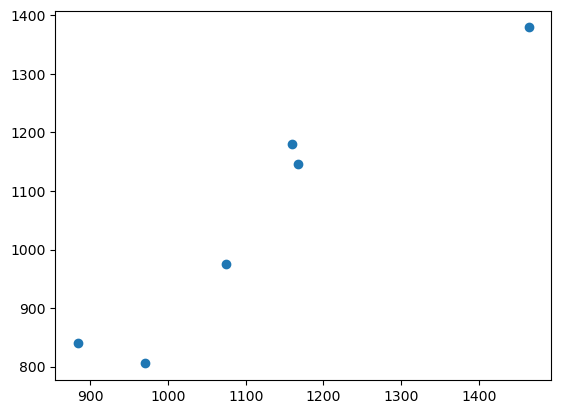

In [64]:
plt.scatter(y_test,y_pred)

In [65]:
residuals = y_test-y_pred
print(residuals)

8     -21.907306
16    165.651169
0      84.600392
18     43.237934
11     99.578549
9      21.505929
Name: index_price, dtype: float64


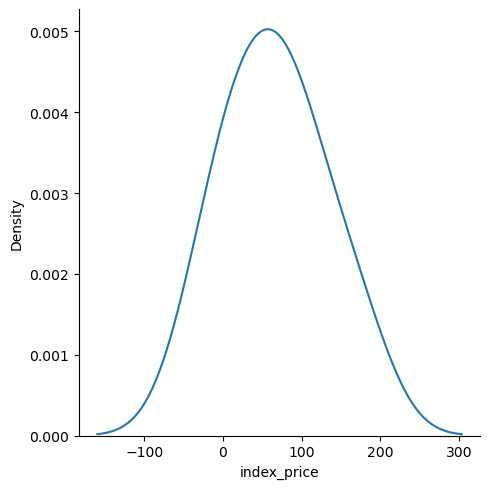

In [66]:
## plot this residuals
sns.displot(residuals,kind='kde')

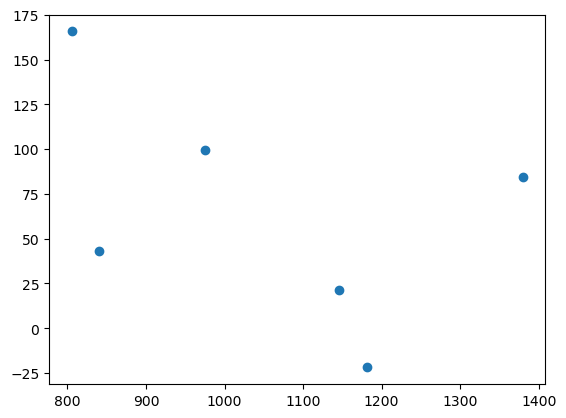

In [67]:
## scatter plot with respect to prediction s and residuals
plt.scatter(y_pred,residuals)

In [69]:
## OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [70]:
model.summary()

C:\Users\91999\anaconda3\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2843
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                       0.756
Time:                        00:51:56   Log-Likelihood:                         -150.87
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.3727    658.998      0.134      0.895   -1308.640    1485.386
x2          -115.0552    658.998     -0.175      0.864   -1512.068    1281.958
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.731
Skew:                          -0.436   Prob(JB):                        0.694
Kurtosis:                       2.537   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
print(regression.coef_)

[  88.37267107 -115.05517173]
